# **From 3D to 2D: DataFrame creation from BIM**

In this tutorial, we are going to learn how to create DataFrames (and later datasets) from BIM files, going through the intemediate steps of IFC (Industrial Foundation Classes) and CSV (Comma-separated values) files.


<center>
<img src="https://drive.google.com/uc?export=view&id=1o8oA6rBSvo6zL7NAwHCg9NmP_SlRkHIP" alt="floor-layout" class="center" width="750px">
</center>


## 📌 **Overview and learning objectives**

This tutorial is about the transition from the conventional method of storing building data (through BIM and IFC files) to the more machine-readable format. The ultimate aim is to come up with a dataset of six different residential building projects from KAAN .

### 🧠 **Learning objectives**
*   Mounting Google Drive in Google Colaboratory
*   Creating GeoPandas DataFrame
*   Cleaning Data
*   Plotting FloorPlans

### 🐍 **New in Python**
- Mounting Google Drive in Google Colaboratory
- Creating a GeoDataFrame
- Cleaning and pre-processing Data
- Plotting FloorPlans
- libraries: pandas, geopandas

### ⛩ [**BatchPlan**](#t1)
- [1.1 Introduction](#t1.1)
- [1.2 KAAN Residential Projects](#t1.2)
- [1.3 Loading Data](#t1.3)

### 🌐 [**GeoDataFrame**](#t2)
- [2.1 Pandas DataFrame](#t2.1)
- [2.2 Cleaning Data](#t2.2)
- [2.3 GeoDataFrame Creation](#t2.3)
- [2.4 Floor plan Visualization](#t2.4)

### 🟡 [**Additional Geopandas (optional)**](#t3)
- [3.1 Maps and Plots](#t3.1)
- [3.2 Geometric Manipulation](#t3.2)
- [3.3 Operations with Overlay](#t3.3)

### 📊 [**Assignment**](#t4)


<a name="t1"></a>
## ⛩ **BatchPlan**

Here we get familiar with BatchPlan and its features, KAAN residential projects (which are our material to work with), and learn how to load files from the Google Drive.

<a name="t1.1"></a>
### 1.1 **Introduction**


BatchPlan is a robust large-scale floor plan extraction solution designed to be highly customizable, extensible, and pluggable in various capacities. BatchPlan accepts one mandatory and one optional input. The mandatory input comprises IFC files, while the optional input involves level files. These level files are formatted as comma-separated vector (CSV) files and encompass heights at which BatchPlan computes floor plans. Users can generate these files conveniently through BatchPlan's Graphical User Interface (GUI). Alternatively, one may manually create a CSV file or employ a script to populate it with the desired heights. This deliberate design choice offers users the flexibility to extract floor plans at various heights on a scalable basis.


<center>
<img src="https://drive.google.com/uc?export=view&id=13sSbQQZMMlwUWVqdvLKif0UN1NdfgOhl" alt="isometric" class="center" width="750px">
</center>


<a name="t1.2"></a>
### 1.2 **KAAN Residential Projects**

For the development and the test phase of the BatchPlan, we will use data from KAAN Architecten projects. Six distinct residential projects have been selected to encompass various design stages, ranging from early design to project construction, including building permit documentation and design development stages.
To ensure consistency and facilitate meaningful comparisons among dataset assets, a decision has been made to focus on both medium- and high-rise housing architectural examples. These projects have been chosen to address different scenarios in which the evolution of the geometric (detailed) aspects of architecture could potentially impact the results of BatchPlan or its processes.
The projects are titled ***De Zalmhaven, The Stack, Lumiere, SPOT, Blok O, and Strijp S- Match box***. More information on the projects can be found here:
https://kaanarchitecten.com/type/residential/

Here is the Strij S - Matchbox Project located in Eindhoven.

<center>
<img src="https://drive.google.com/uc?export=view&id=1j0bJWwaRcaP8DFXcwhYAoFcCrwaDYMLW" alt="isometric" class="center" width="750px">
</center>


As an example, we take the third floor of the ***Strijp S - Match Box*** project, Whose isometric view looks like this:


<center>
<img src="https://drive.google.com/uc?export=view&id=1Qo9jf2_jWEwU6YsaF4eqXKeDEmQ-Sd6o" alt="isometric" class="center" width="750px">
</center>

and its floor plan:

<center>
<img src="https://drive.google.com/uc?export=view&id=1jfIhODIOg7i5fr6VfW093rv8NKKypMo2" alt="floor-plan" class="center" width="750px">
</center>


<a name="t1.3"></a>
### 1.3 **Loading Data**

 We are aiming to make use of the available datasets. Normally, datasets are released in Comma-separated value (.csv) files. Therefore, it is needed to be able to load this file format to make use of them in programming platfroms.

In order to create the DataFrame, we first need to load the raw data (normally in .csv format) to the notebook. A convenient way to do so is directly using the files that are saved in our Google Drive. Here we mount the Google Drive to use the files stored there in this notebook. We can use the **os** module to open the desired folder in the drive. The OS module in Python provides functions for interacting with the operating system.

In [ ]:
#importing drive and os libraries
from google.colab import drive
import os

In [ ]:
#mounting google drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#checking the current working directory
os.getcwd()

'/content'

In [ ]:
#giving the directory of the files
path = "/content/drive/MyDrive/KAAN_Projects/Strijp_S"
os.chdir(path)

<a name="t2"></a>
## 🌐 **GeoDataFrame**
Here we learn how to create Pandas DataFrame, clean and pre-process the data, create a GeoDataFrame, and visualize floor plans.

<a name="t2.1"></a>
### 2.1 **Pandas DataFrame**

In order to make an efficient analysis on big data of several buildings, it is necessary to create a so-called clean DataFrame. One of the most practical libraries to deal with DataFrames is pandas, an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. A DataFrame Data structure contains labeled axes (rows and columns). As the first step of DataFrame creation, we use **Pandas library**.
The Pandas's highlights are as follows:


*   A fast and efficient DataFrame object for data manipulation with integrated indexing
*   Tools for reading and writing data between different formats: CSV and text files, Microsoft Excel, etc
*   Intelligent label-based slicing, fancy indexing, and subsetting of large data sets
*   Size mutability by inserting and deleting columns
*   High performance merging and joining of data sets



In [ ]:
#importing pandas library
import pandas as pd
#importing numpy library
import numpy as np

In [ ]:
#Constructing DataFrame from numpy ndarray:
df = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
                   columns=['a', 'b', 'c'])
df

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


Now we want to create a DataFrame from the csv files that we have stored in the Google Drive. Now that the Drive is already mounted, the only thing to do is to read the specified. If we have a certain naming convention among the files that we want to load, it is easier to only use the variant part as the variable, and keep the repetitive part of the names as a fixed integer. In the following example, we assume that we have the naming convention of "project name" + "-KAAN.csv". After writing the project's name as the "buildingname" variable, we can use the ***read.csv*** function of Pandas to load the desired file.

In [ ]:
#name of the file as the variable
project_name = "STRIJP-KAAN-ZZ-ZZ-M-A-0101"
#reading a comma-separated values (csv) file into DataFrame
StrijpS_df = pd.read_csv(project_name+".csv")

<ipython-input-20-ebe7f6177eaf>:4: DtypeWarning: Columns (10,11,12,15,16,17,20,21,22,23,25,26,28,31,43,44,46,47,50,51,52,53,55,56,57,60,61,62,64,65,67,68,72,73,74,78,79,81,82,83,84,85,90,92,94,97,99,100,104,107,109,113,116,117,122,123,126,127,129,130,132,133,148,150,152,157,158,160,168,169,174,176,178,180,182,184,186,187,189,190,194,198,201,207,208,210,215,216,217,221,230,232,233,234,238,239,242,246,257,260,261,262,266,272,275,278,280,281,283,284,286) have mixed types. Specify dtype option on import or set low_memory=False.
  StrijpS_df = pd.read_csv(project_name+".csv")


Here we have created a DataFrame with the name "Strijp03_df". Next, we will get familiarized with the data and learn how to clean the DataFrame.

<a name="t2.2"></a>
### 2.2 **Cleaning Data**


Data cleaning and pre-processing are performed for data and metadata consistency. In data cleaning process, redundant data is removed and incorrect, incomplete, irrelevant, or improperly formatted data is modified. The data cleaning extends to fixing spelling and syntax errors, and standardizing data. Data pre-processing is tailored towards the selection, manipulation, and format processing of for the downstream task.

The preliminary step to clean the data, is ***to get to know the raw data***. For instance, the data types that the file contains, the features (in other words, the columns), the first and last few rows of the DataFrame, and the number of unique items per feature. The following functions used in this block will help getting familiar with the DataFrame and make it ready for the subsequent steps.


In [ ]:
#printing a concise summary of a DataFrame
StrijpS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Columns: 288 entries, Unnamed: 0 to KAAN_ILS Summary.id
dtypes: float64(169), int64(2), object(117)
memory usage: 15.4+ MB


Based on the results of the last function, we know that the DataFrame has a certain number of columns. Mostly, we are interested in knowing the features a DataFrame affords. Therefore, it is also useful to get a list of column names. Next, we can decide which columns to keep and which to ignore based on our desired task.

In [ ]:
#printing the list of features
list(StrijpS_df.columns)

['Unnamed: 0',
 'ExpressId',
 'GlobalId',
 'Class',
 'PredefinedType',
 'Name',
 'Level',
 'x_coordinate',
 'y_coordinate',
 'z_coordinate',
 'Type',
 'Material',
 'Pset_SlabCommon.LoadBearing',
 'Qto_SpaceBaseQuantities.NetVolume',
 'KAAN_Qtos.Volume',
 'Pset_SpaceCoveringRequirements.FloorCovering',
 'Pset_BuildingStoreyCommon.AboveGround',
 'Qto_WallBaseQuantities.K_g2_brick_running_240x70mm',
 'Qto_StairFlightBaseQuantities.Length',
 'Qto_ColumnBaseQuantities.GrossVolume',
 'Qto_WallBaseQuantities.K_h2_Metal stud profiling',
 'Qto_WallBaseQuantities.K_i0_CLT Wood',
 'Pset_OpeningElementCommon.Reference',
 'Pset_BeamCommon.LoadBearing',
 'KAAN_ILS Summary.3.4 IFC Entiteit | IFC Class',
 'Pset_BeamCommon.FireRating',
 'Qto_SlabBaseQuantities.K_00_Air substructure',
 'Qto_SlabBaseQuantities.id',
 'Qto_WallBaseQuantities.K_f7_Stucco (2)',
 'Pset_StairCommon.WalkingLineOffset',
 'Qto_BeamBaseQuantities.id',
 'Pset_WindowCommon.IsExternal',
 'KAAN_Qtos.OpenablePart_Height',
 'Pset_SpaceC

In [ ]:
#getting the first 5 rows of the DataFrame
StrijpS_df.head()

,Unnamed: 0,ExpressId,GlobalId,Class,PredefinedType,Name,Level,x_coordinate,y_coordinate,z_coordinate,...,Pset_ManufacturerTypeInformation.Manufacturer,KAAN_ILS Summary.4.6 Geluidisolatie | Acoustic Value,Qto_WallBaseQuantities.K_i2_Wood_planks_240mm_vertical,Qto_WallBaseQuantities.K_i2_Wood_planks_240mm_vertical (2),Pset_FurnitureTypeCommon.id,Pset_DoorCommon.IsExternal,Pset_BuildingCommon.Reference,Qto_BuildingElementProxyQuantities.NetVolume,Pset_RailingCommon.IsExternal,KAAN_ILS Summary.id
0,0,97,0CfLBxMtb1CPqMkok2OeNY,IfcBuilding,NaN,<Building name>,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Project Information,NaN,NaN,494049.0
1,1,100,0CfLBxMtb1CPqMkojzdNia,IfcBuildingStorey,Level:Standard,00 begane grond,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,493977.0
2,2,104,0aJAQrAJnAmBa0GD07waS7,IfcBuildingStorey,Level:Standard,01 eerste verdieping,NaN,0.0,0.0,3700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,493984.0
3,3,108,0aJAQrAJnAmBa0GD07waSC,IfcBuildingStorey,Level:Standard,02 tweede verdieping,NaN,0.0,0.0,7400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,493991.0
4,4,112,0aJAQrAJnAmBa0GD07waSt,IfcBuildingStorey,Level:Standard,03 derde verdieping,NaN,0.0,0.0,11100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,493998.0


In [ ]:
#getting the last 5 rows of the DataFrame
StrijpS_df.tail()

,Unnamed: 0,ExpressId,GlobalId,Class,PredefinedType,Name,Level,x_coordinate,y_coordinate,z_coordinate,...,Pset_ManufacturerTypeInformation.Manufacturer,KAAN_ILS Summary.4.6 Geluidisolatie | Acoustic Value,Qto_WallBaseQuantities.K_i2_Wood_planks_240mm_vertical,Qto_WallBaseQuantities.K_i2_Wood_planks_240mm_vertical (2),Pset_FurnitureTypeCommon.id,Pset_DoorCommon.IsExternal,Pset_BuildingCommon.Reference,Qto_BuildingElementProxyQuantities.NetVolume,Pset_RailingCommon.IsExternal,KAAN_ILS Summary.id
6995,6995,517673,2tUVg4MA6VP$A643zQ7bW7,IfcOpeningElement,OPENING,K_32_DO_WB_Single:DO.xxxx_1040x2160mm:4946117:1,NaN,37110.0,12760.0,20550.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6996,6996,517694,2jaTPaGWHetDmamrl44Lib,IfcOpeningElement,OPENING,K_32_DO_WB_Single:DO.xxxx_1040x2160mm:4946126:1,NaN,38165.0,11230.0,20550.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6997,6997,517715,3YAJ38x7vu7Ds_R2ra7b3f,IfcOpeningElement,OPENING,K_32_DO_WB_Single:DO.xxxx_1040x2600mm:4983221:1,NaN,24450.0,26070.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6998,6998,517736,1D9Yxbxlr_woI3XwVBNGf2,IfcOpeningElement,OPENING,K_32_DO_WB_Single door:DO.xxxx_1250x2300mm:504...,NaN,42785.0,10695.0,11100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6999,6999,517757,24ZM$4TvuTdFxLWYYz6Yf0,IfcOpeningElement,OPENING,K_32_DO_WB_Single door:DO.xxxx_1250x2300mm:504...,NaN,42785.0,12095.0,11100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


After grasping an overal idea of the content, we can clean the DataFrame based on the specified task requirements.

Some columns of the rawdata DataFrame are selected as an example in the following block. Then the DataFrame is shown (note that if we do not specify the head or the tail of the dataset, both are shown).

In [ ]:
selected_df = StrijpS_df[['Class', 'PredefinedType', 'Level', 'x_coordinate', 'y_coordinate','z_coordinate', 'Material']]
selected_df

,Class,PredefinedType,Level,x_coordinate,y_coordinate,z_coordinate,Material
0,IfcBuilding,NaN,NaN,0.0,0.0,0.0,NaN
1,IfcBuildingStorey,Level:Standard,NaN,0.0,0.0,0.0,NaN
2,IfcBuildingStorey,Level:Standard,NaN,0.0,0.0,3700.0,NaN
3,IfcBuildingStorey,Level:Standard,NaN,0.0,0.0,7400.0,NaN
4,IfcBuildingStorey,Level:Standard,NaN,0.0,0.0,11100.0,NaN
...,...,...,...,...,...,...,...
6995,IfcOpeningElement,OPENING,NaN,37110.0,12760.0,20550.0,NaN
6996,IfcOpeningElement,OPENING,NaN,38165.0,11230.0,20550.0,NaN
6997,IfcOpeningElement,OPENING,NaN,24450.0,26070.0,0.0,NaN
6998,IfcOpeningElement,OPENING,NaN,42785.0,10695.0,11100.0,NaN


Sometimes we are interested in the number of unique values in certain columns. Also, we might need a list of unique values in a certain column (and not necessarily the number of them). The following blocks will go through the abovementioned applications.

In [ ]:
#printing the number of unique ids in the selected DataFrame
print(selected_df.nunique())

Class              23
PredefinedType     23
Level             182
x_coordinate      681
y_coordinate      636
z_coordinate      188
Material           82
dtype: int64


In [ ]:
#printing the list of unique values in a certain column
print(selected_df.Material.unique())

[nan '<Unnamed>' 'K_i2_softwood' 'K_f2_concrete_in-situ'
 'Floor:K_23_FL_Wood CLT_240mm' 'K_i0_CLT Wood' 'K_i2_softwood_horizontal'
 'Floor:K_23_FL_Concrete_205mm' 'K_i3_Hardwood vertical_azobe'
 'K_m1_Insulation_Mineral wool' 'K_i3_Hardwood horizontal_azobe'
 'Basic Wall:K_21_WA_Aluminium framework_100mm'
 'Basic Wall:K_21_WA_Wood_190mm' 'Floor:K_27_FL_Soil+grass_300mm'
 'Basic Wall:K_21_WA_Wood+Insulation_220mm'
 'Basic Wall:K_22_WA_Metalstud_dubbel_2.75-75.2_360mm'
 'Basic Wall:K_22_WA_Metalstud_2.75-75.2_205mm'
 'Basic Wall:K_22_WA_Metalstud_2.105.2_155mm'
 'Basic Wall:K_22_WA_Metalstud_2.50.2_100mm'
 'K_00_Clash material_Operation zone'
 'Floor:K_43_FL_Floor tiles_50x50mm_15mm'
 'Basic Wall:K_22_WA_Brickwork_150mm'
 'Basic Wall:K_22_WA_Metalstud_2.75_100mm'
 'Basic Wall:K_22_WA_Brickwork_220mm' 'K_i0_Wood_strip_125x1000mm'
 'Floor:K_23_FL_Concrete+screed_205mm'
 'Basic Wall:K_41_WA_Insulation_180mm'
 'Basic Wall:K_22_WA_Metalstud_2.80_110mm'
 'K_generic_clash material_operation' '

If we are interested in keeping the rows with actual values (in other words, rows without NaN values), we can use the dropna() function over the DataFrame.

In [ ]:
clean_df= selected_df.dropna()
clean_df
#pay attention to the reduced number of rows after filtering data

,Class,PredefinedType,Level,x_coordinate,y_coordinate,z_coordinate,Material
421,IfcBuildingElementProxy,NOTDEFINED,00 begane grond,0.0,0.0,0.0,<Unnamed>
422,IfcColumn,COLUMN,00 begane grond,0.0,0.0,0.0,K_i2_softwood
423,IfcColumn,COLUMN,00 begane grond,0.0,0.0,0.0,K_i2_softwood
424,IfcColumn,COLUMN,00 begane grond,0.0,0.0,0.0,K_i2_softwood
425,IfcColumn,COLUMN,00 begane grond,0.0,0.0,0.0,K_i2_softwood
...,...,...,...,...,...,...,...
6081,IfcBeam,BEAM,03 derde verdieping,0.0,0.0,0.0,K_i3_Hardwood horizontal_azobe
6082,IfcBeam,BEAM,03 derde verdieping,0.0,0.0,0.0,K_i3_Hardwood horizontal_azobe
6083,IfcSlab,FLOOR,03 derde verdieping,0.0,0.0,11100.0,Floor:K_23_FL_Screed+insulation_160mm
6084,IfcSlab,FLOOR,03 derde verdieping,0.0,0.0,11100.0,Floor:K_23_FL_Screed+insulation_160mm


<a name="t2.3"></a>
### 2.3 **GeoDataFrame Creation**

GeoPandas is an open source project to add support for geographic data to pandas objects. The goal of GeoPandas is to make working with geospatial data in python easier. It combines the capabilities of ***pandas*** and ***shapely*** libraries, providing geospatial operations in pandas and a high-level interface to multiple geometries to shapely. GeoPandas offers functionality for every step of a typical geospatial workflow, from reading of the GIS file formats to geometry operations and handling of Coordinate Reference Systems (CRS) and transformation of geometries between them.
<center>
<img src="https://geopandas.org/en/stable/_images/geopandas_logo.png" alt="isometric" class="center" width="750px">
</center>


All the following cells about Geopandas are the summary of the library's documentation: https://geopandas.org/en/stable/docs.html


In [ ]:
#importing the geopandas library
import geopandas as gpd


GeoPandas implements two main data structures, a GeoSeries and a GeoDataFrame.
A GeoSeries is essentially a vector where each entry in the vector may consist of only one shape (like a single polygon) or multiple shapes (like the many polygons that make up the State of Hawaii or a country like Indonesia).

GeoPandas has three basic classes of geometric objects (which are actually shapely objects):

*   Points / Multi-Points
*   Lines / Multi-Lines
*   Polygons / Multi-Polygons

A GeoDataFrame is a tabular data structure that contains a GeoSeries. The most important property of a GeoDataFrame is that it always has one GeoSeries column that holds a special status. This GeoSeries is referred to as the GeoDataFrame’s “geometry”. When a spatial method is applied to a GeoDataFrame (or a spatial attribute like area is called), this commands will always act on the “geometry” column.



The coordinate reference system (CRS) tells Python how those coordinates relate to places on the Earth. CRS is important because the geometric shapes in a GeoSeries or GeoDataFrame object are simply a collection of coordinates in an arbitrary space.


![alt text](https://pygis.io/_images/d_crs_assigned.png)


For reference codes of the most commonly used projections, see [spatialreference.org](https://).

Generally, WKT or SRID’s are preferred over PROJ strings as they can contain more information about a given CRS. In this tutorial, we will work with WKT format. One of the outputs of the abovementiod BatchPlan is a csv file containing a column of geometry for all the elements prsent in a certain floor plan. Here we will first load the csv file and then try to build a GeoDataFrame based on that.

In [ ]:
#name of the file as the variable
floor_name = "03 derde verdieping"
#reading a comma-separated values (csv) file into DataFrame
StrijpS03_df = pd.read_csv(floor_name+".csv")

Now that we have created the Pandas DataFrame, we can get familiar with the content using the previously mentioned methods in section 2.2.

In [ ]:
#printing the list of features
list(StrijpS03_df.columns)

['type', 'name', 'geometry']

In [ ]:
#printing the number of unique ids in the selected DataFrame
print(StrijpS03_df.nunique())

type         11
name        891
geometry    919
dtype: int64


In [ ]:
#printing the list of unique values in a certain column
print(StrijpS03_df.type.unique())

['IfcOpeningElement' 'IfcWall' 'IfcBuildingElementProxy' 'IfcDoor'
 'IfcStairFlight' 'IfcSlab' 'IfcFurnishingElement' 'IfcColumn' 'IfcWindow'
 'IfcFurniture' 'IfcSpace']


In [ ]:
#getting the first 5 rows
StrijpS03_df.head()

,type,name,geometry
0,IfcOpeningElement,K_32_DO_WB_Single door:DO.xxxx_1250x2300mm:504...,"MULTIPOLYGON (((42.785 10.695, 42.565 10.695, ..."
1,IfcOpeningElement,K_32_DO_WB_Single door:DO.xxxx_1250x2300mm:504...,"MULTIPOLYGON (((42.785 12.095, 42.565 12.095, ..."
2,IfcOpeningElement,K_32_DO_WB_Single:DO.xxxx_1040x2160mm:4944476:1,"MULTIPOLYGON (((38.165 11.23, 38.265 11.23, 38..."
3,IfcOpeningElement,K_32_DO_WB_Single:DO.xxxx_1040x2160mm:4943846:1,"MULTIPOLYGON (((14.05 12.76, 14.05 12.86, 15.0..."
4,IfcOpeningElement,K_32_DO_WB_Single:DO.xxxx_1040x2160mm:4943855:1,"MULTIPOLYGON (((14.035 10.19, 13.935 10.19, 13..."


In [ ]:
Spaces = StrijpS03_df[StrijpS03_df['type'] == "IfcSpace"]
Spaces

,type,name,geometry
776,IfcSpace,15,"MULTIPOLYGON (((30.085 26.32, 31.26 26.32, 31...."
777,IfcSpace,174,"MULTIPOLYGON (((9.41 9.205, 9.41 31.795, 42.79..."
778,IfcSpace,13,"MULTIPOLYGON (((20.28 24.11, 20.28 25.16, 20.9..."
779,IfcSpace,14,"MULTIPOLYGON (((22.5 26.07, 23.7 26.07, 23.7 2..."
780,IfcSpace,07,"MULTIPOLYGON (((31.92 25.92, 42.69 25.92, 42.6..."
...,...,...,...
853,IfcSpace,03.B02.01,"MULTIPOLYGON (((15.09 12.76, 15.09 12.745, 16...."
854,IfcSpace,03.B01.02,"MULTIPOLYGON (((9.205 9.19, 9.205 9.395, 9.395..."
855,IfcSpace,03.B01.01,"MULTIPOLYGON (((9.635 15.08, 9.635 20.32, 14.0..."
856,IfcSpace,03.A07.01,"MULTIPOLYGON (((33.96 14.72, 42.565 14.72, 42...."


Here we convert the clean DF with a geometry column to a GeoDataFrame.

In [ ]:
#first change dataframe to geopandas dataframe
gs = gpd.GeoSeries.from_wkt(StrijpS03_df['geometry'])
gdf_test_floor = gpd.GeoDataFrame(StrijpS03_df, geometry=gs, crs=None)

<Axes: >

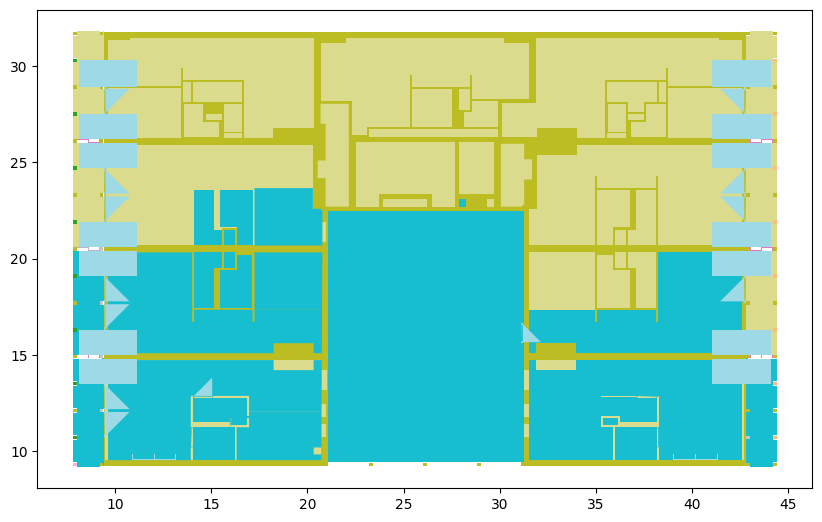

In [ ]:
#plotting the created geodataframe
gdf_test_floor.plot(cmap="tab20", legend=True, figsize=(10,10))

<a name="t2.4"></a>
### 2.4 **Floorplan Visualization**

<Axes: >

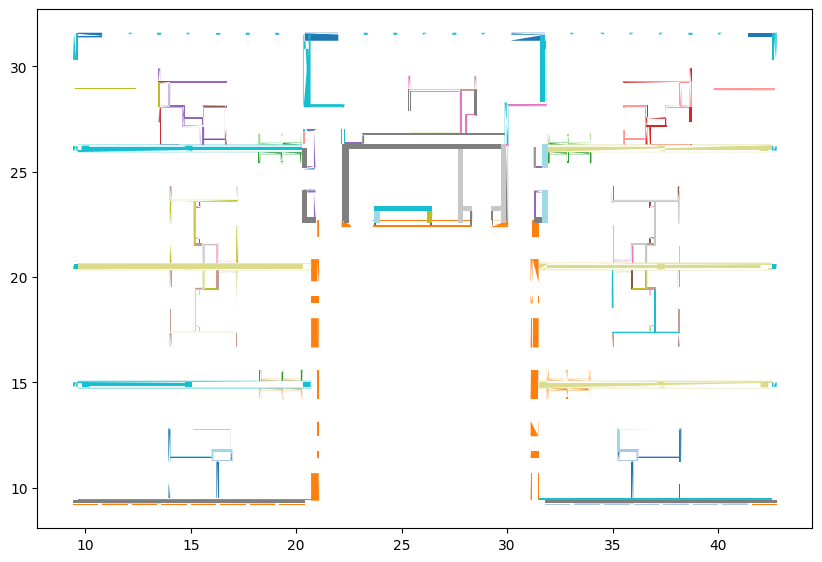

In [ ]:
#finding data about specific ids
selected = StrijpS03_df.loc[StrijpS03_df['type'] == "IfcWall"]

#first change dataframe to geopandas dataframe
gs = gpd.GeoSeries.from_wkt(StrijpS03_df['geometry'])
gdf_test_floor = gpd.GeoDataFrame(selected, geometry=gs, crs=None)
gdf_test_floor.plot(cmap="tab20", legend=True, figsize=(10,10))

<Axes: >

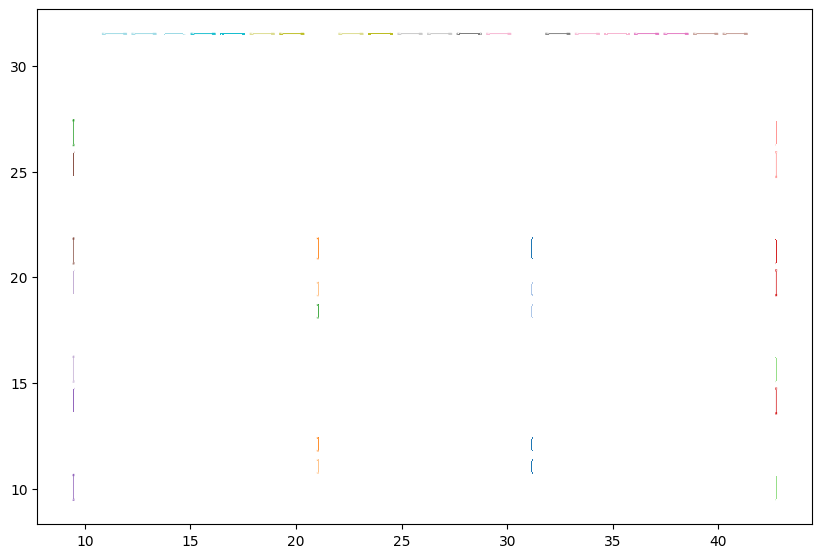

In [ ]:
#finding data about specific ids
selected = StrijpS03_df.loc[StrijpS03_df['type'] == "IfcWindow"]

#first change dataframe to geopandas dataframe
gs = gpd.GeoSeries.from_wkt(StrijpS03_df['geometry'])
gdf_test_floor = gpd.GeoDataFrame(selected, geometry=gs, crs=None)
gdf_test_floor.plot(cmap="tab20", legend=True, figsize=(10,10))

<Axes: >

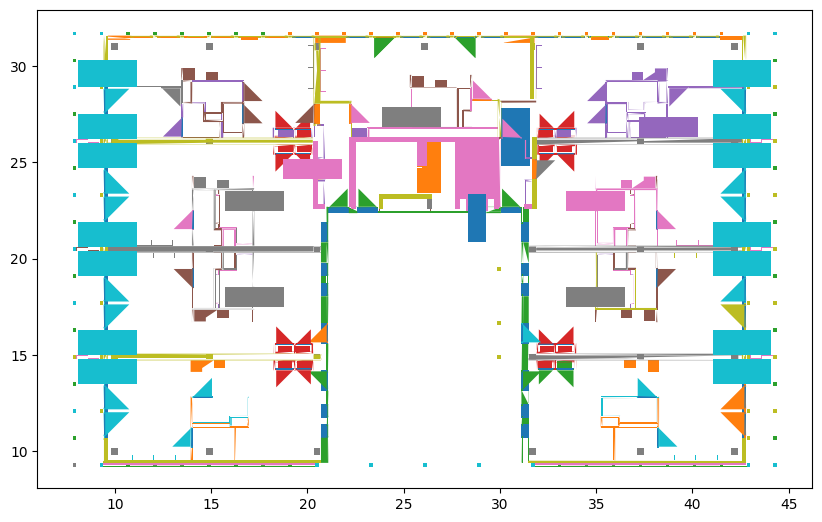

In [ ]:
#finding data about specific ids
selected = StrijpS03_df.loc[StrijpS03_df['type'] != "IfcSpace"]

#first change dataframe to geopandas dataframe
gs = gpd.GeoSeries.from_wkt(StrijpS03_df['geometry'])
gdf_test_floor = gpd.GeoDataFrame(selected, geometry=gs, crs=None)
gdf_test_floor.plot(cmap="tab10", legend=True, figsize=(10,10))

<Axes: >

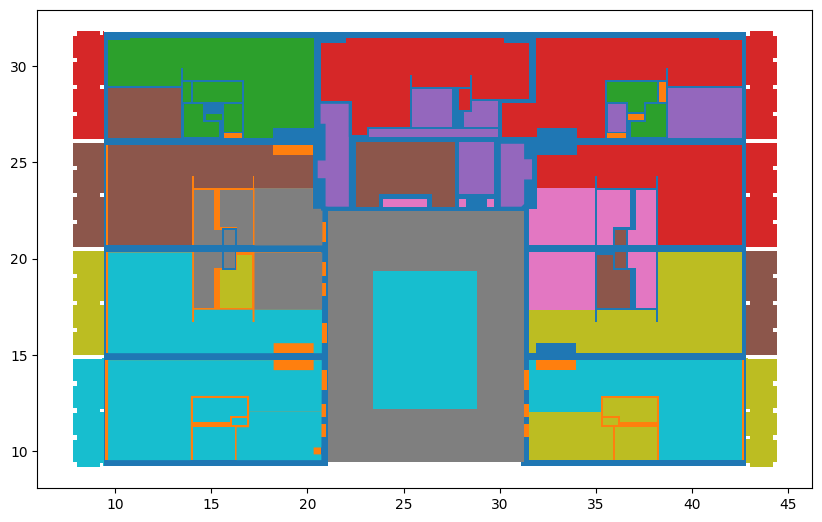

In [ ]:
#finding data about specific ids
selected = StrijpS03_df.loc[StrijpS03_df['type'] == "IfcSpace"]

#first change dataframe to geopandas dataframe
gs = gpd.GeoSeries.from_wkt(StrijpS03_df['geometry'])
gdf_test_floor = gpd.GeoDataFrame(selected, geometry=gs, crs=None)
gdf_test_floor.plot(cmap="tab10", legend=True, figsize=(10,10))

<Axes: >

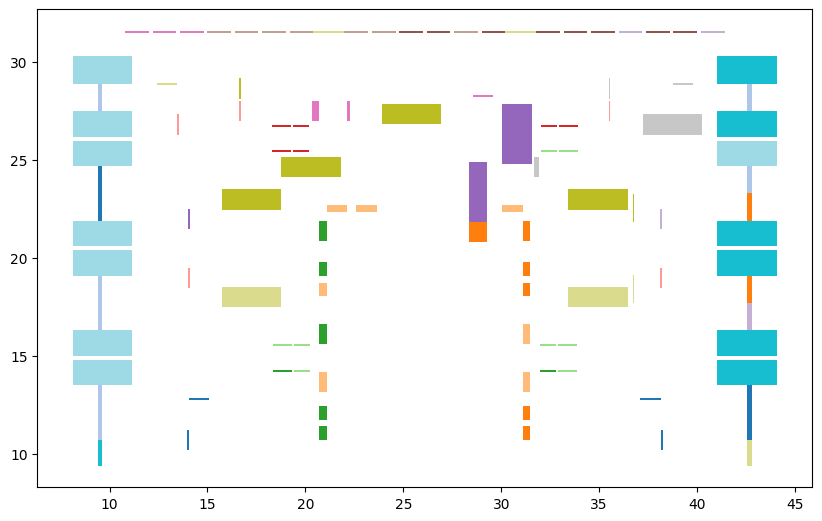

In [ ]:
#finding data about specific ids
selected = StrijpS03_df.loc[StrijpS03_df['type'] == "IfcOpeningElement"]

#first change dataframe to geopandas dataframe
gs = gpd.GeoSeries.from_wkt(StrijpS03_df['geometry'])
gdf_test_floor = gpd.GeoDataFrame(selected, geometry=gs, crs=None)
gdf_test_floor.plot(cmap="tab20", legend=True, figsize=(10,10))

<Axes: >

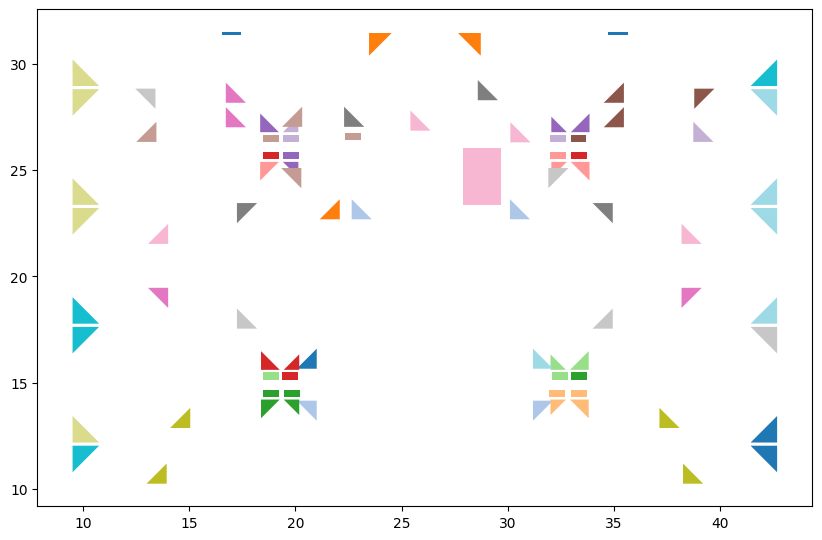

In [ ]:
#finding data about specific ids
selected = StrijpS03_df.loc[StrijpS03_df['type'] == "IfcBuildingElementProxy"]

#first change dataframe to geopandas dataframe
gs = gpd.GeoSeries.from_wkt(StrijpS03_df['geometry'])
gdf_test_floor = gpd.GeoDataFrame(selected, geometry=gs, crs=None)
gdf_test_floor.plot(cmap="tab20", legend=True, figsize=(10,10))

<Axes: >

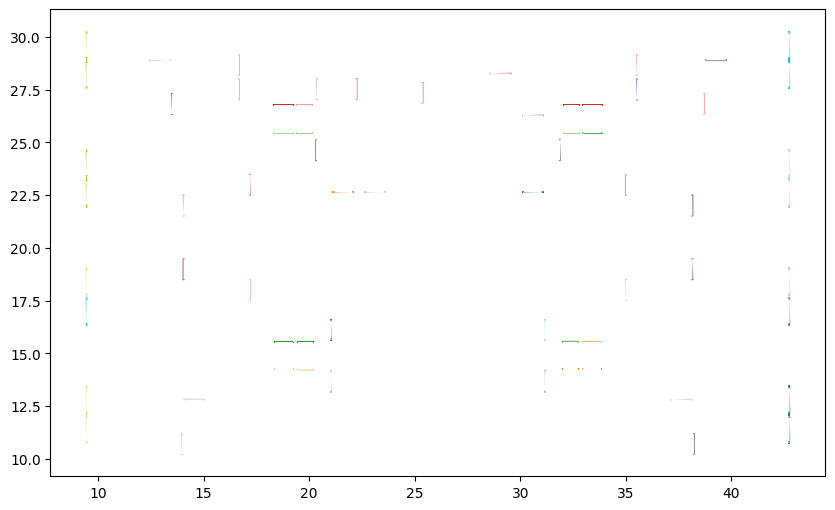

In [ ]:
#finding data about specific ids
selected = StrijpS03_df.loc[StrijpS03_df['type'] == "IfcDoor"]

#first change dataframe to geopandas dataframe
gs = gpd.GeoSeries.from_wkt(StrijpS03_df['geometry'])
gdf_test_floor = gpd.GeoDataFrame(selected, geometry=gs, crs=None)
gdf_test_floor.plot(cmap="tab20", legend=True, figsize=(10,10))


<a name="t3"></a>
## 🟡 **Additional GeoPandas (optional)**

In this section, we play around with some other functions offered by Geopandas, using the prepared geodatasets.

In [ ]:
!pip install geodatasets

In [ ]:
#importing the geodatasets module
import geodatasets

GeoPandas inherits the standard pandas methods for indexing/selecting data. This includes label based indexing with loc and integer position based indexing with iloc, which apply to both GeoSeries and GeoDataFrame objects.

Extracting 'flma/FLMA.geojson' from '/root/.cache/geodatasets/flma.zip' to '/root/.cache/geodatasets/flma.zip.unzip'


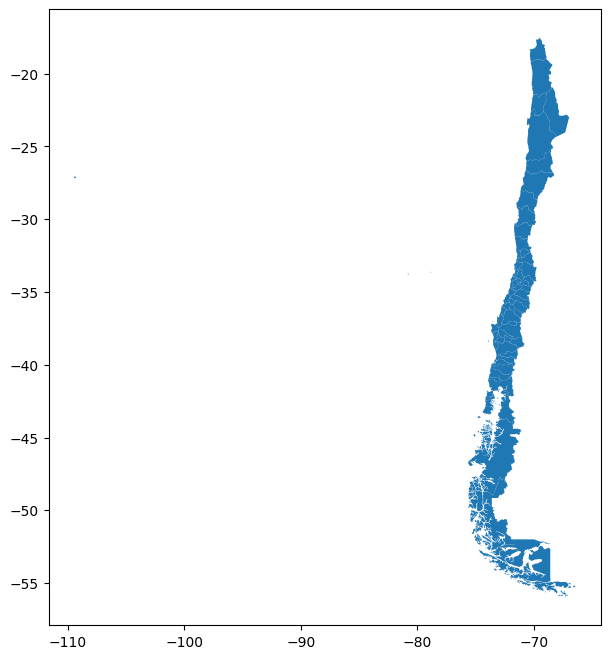

In [ ]:
#using one of geo datasets for this example
chile = gpd.read_file(geodatasets.get_path('geoda.chile_labor'))
chile.plot(figsize=(8, 8),);

In addition to the standard pandas methods, GeoPandas also provides coordinate based indexing with the ***cx*** indexer, which slices using a bounding box. Geometries in the GeoSeries or GeoDataFrame that intersect the bounding box will be returned.

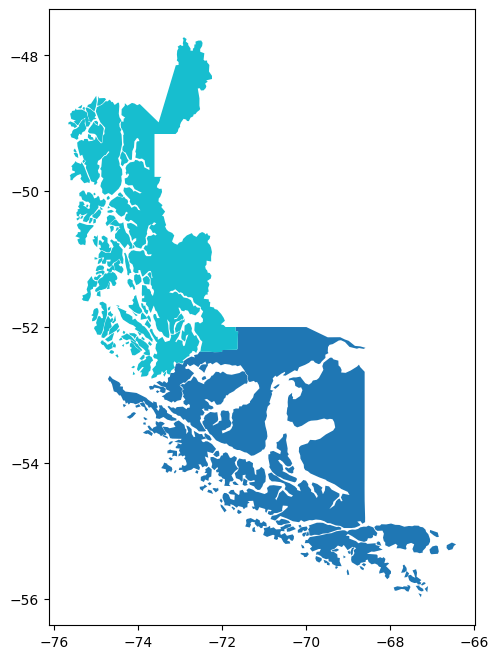

In [ ]:
#selecting parts of Chile whose boundaries extend south of the -50 degrees latitude

southern_chile = chile.cx[:, :-50]

southern_chile.plot(figsize=(8, 8), cmap ='tab10');

<a name="t3.1"></a>
### 3.1 **Maps and Plots**

GeoPandas provides a high-level interface to the matplotlib library for making maps. Mapping shapes is as easy as using the plot() method on a GeoSeries or GeoDataFrame.



Extracting 'chicago_commpop/chicago_commpop.geojson' from '/root/.cache/geodatasets/chicago_commpop.zip' to '/root/.cache/geodatasets/chicago_commpop.zip.unzip'


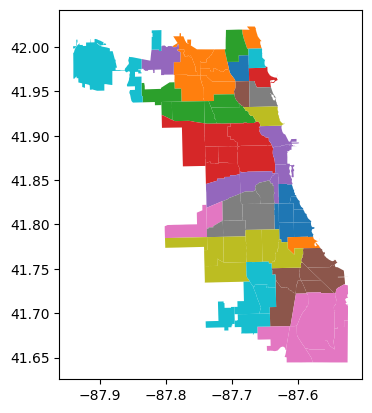

In [ ]:
#plotting example on Chicago
chicago = gpd.read_file(geodatasets.get_path("geoda.chicago_commpop"))
chicago.plot(cmap='tab10');


GeoPandas makes it easy to create Choropleth maps (maps where the color of each shape is based on the value of an associated variable). Simply use the plot command with the column argument set to the column whose values you want used to assign colors.

To create the Coropleth of Chicago, it's practical at first to know what are the column types that exist in the dataset. Then, we can plot the coropleth map based on the desired column.

In [ ]:
list(chicago.columns)

['community',
 'NID',
 'POP2010',
 'POP2000',
 'POPCH',
 'POPPERCH',
 'popplus',
 'popneg',
 'geometry']

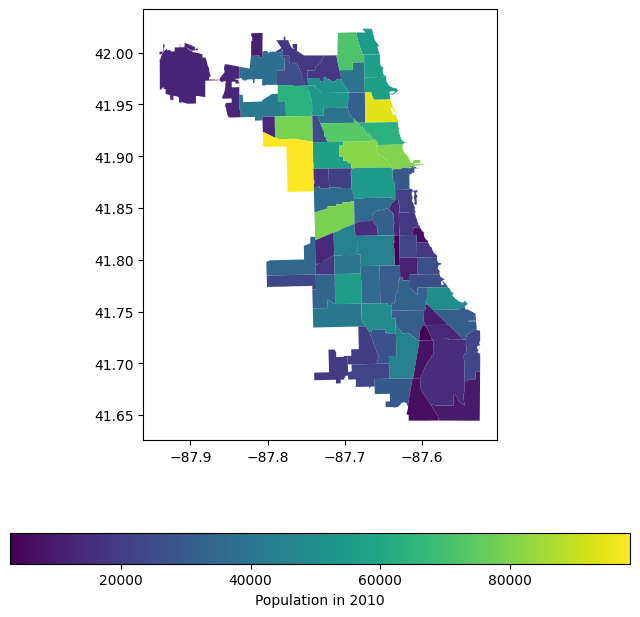

In [ ]:
chicago.plot(column="POP2010", figsize=(8, 8), legend = True, legend_kwds={"label": "Population in 2010", "orientation": "horizontal"});

<a name="t3.2"></a>
### 3.2 **Geometric Manipulation**

GeoPandas makes available all the tools for geometric manipulations in the Shapely library. Here we can see a number of useful functions. It is always possible to check for other functions in the documentation.

![alt text](https://geopandas.org/en/stable/_images/binary_geo-intersection.svg)


*   GeoSeries.buffer:
  Returns a GeoSeries of geometries representing all points within a given distance of each geometric object.
*   GeoSeries.boundary:
Returns a GeoSeries of lower dimensional objects representing each geometry’s set-theoretic boundary.
*   GeoSeries.centroid: Returns a GeoSeries of points for each geometric centroid.
*   GeoSeries.envelope:
Returns a GeoSeries of geometries representing the point or smallest rectangular polygon (with sides parallel to the coordinate axes) that contains each object.
*   GeoSeries.rotate: Rotate the coordinates of the GeoSeries.
*   GeoSeries.scale: Scale the geometries of the GeoSeries along each (x, y, z) dimension.
*   GeoSeries.convex_hull:
Returns a GeoSeries of geometries representing the smallest convex Polygon containing all the points in each object unless the number of points in the object is less than three. For two points, the convex hull collapses to a LineString; for 1, a Point.

Extracting 'nybb_16a/nybb.shp' from '/root/.cache/geodatasets/nybb_16a.zip' to '/root/.cache/geodatasets/nybb_16a.zip.unzip'
Extracting 'nybb_16a/nybb.shx' from '/root/.cache/geodatasets/nybb_16a.zip' to '/root/.cache/geodatasets/nybb_16a.zip.unzip'
Extracting 'nybb_16a/nybb.dbf' from '/root/.cache/geodatasets/nybb_16a.zip' to '/root/.cache/geodatasets/nybb_16a.zip.unzip'
Extracting 'nybb_16a/nybb.prj' from '/root/.cache/geodatasets/nybb_16a.zip' to '/root/.cache/geodatasets/nybb_16a.zip.unzip'


<Axes: >

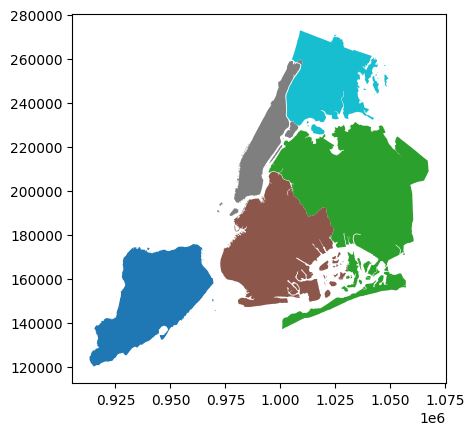

In [ ]:
#example of some geometric manipulations
nybb_path = geodatasets.get_path('nybb')
boros = gpd.read_file(nybb_path)
boros.plot(cmap='tab10')

<Axes: >

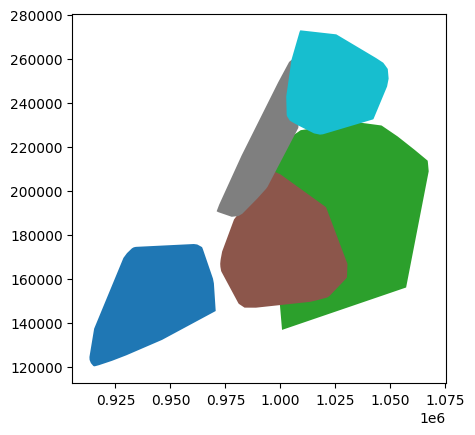

In [ ]:
#plotting the convext hull of the previous map
boros_ch = boros.convex_hull
boros_ch.plot(cmap='tab10')

<a name="t3.3"></a>
### 3.3 **Operations with Overlay**

When working with multiple spatial datasets – especially multiple polygon or line datasets – users often wish to create new shapes based on places where those datasets overlap (or don’t overlap). These manipulations are often referred using the language of sets – intersections, unions, and differences. These types of operations are made available in the GeoPandas library through the overlay() method.

The basic idea is demonstrated by the graphic below but keep in mind that overlays operate at the DataFrame level, not on individual geometries, and the properties from both are retained. In effect, for every shape in the left GeoDataFrame, this operation is executed against every other shape in the right GeoDataFrame:


![alt text](https://geopandas.org/en/stable/_images/overlay_operations.png)


In [ ]:
# Example of overlay with the Chicago and Groceries geodatasets
chicago = gpd.read_file(geodatasets.get_path("geoda.chicago_commpop"))
groceries = gpd.read_file(geodatasets.get_path("geoda.groceries"))

# Project to crs that uses meters as distance measure
chicago = chicago.to_crs("ESRI:102003")

groceries = groceries.to_crs("ESRI:102003")

Extracting 'grocery/chicago_sup.shp' from '/root/.cache/geodatasets/grocery.zip' to '/root/.cache/geodatasets/grocery.zip.unzip'
Extracting 'grocery/chicago_sup.dbf' from '/root/.cache/geodatasets/grocery.zip' to '/root/.cache/geodatasets/grocery.zip.unzip'
Extracting 'grocery/chicago_sup.shx' from '/root/.cache/geodatasets/grocery.zip' to '/root/.cache/geodatasets/grocery.zip.unzip'
Extracting 'grocery/chicago_sup.prj' from '/root/.cache/geodatasets/grocery.zip' to '/root/.cache/geodatasets/grocery.zip.unzip'


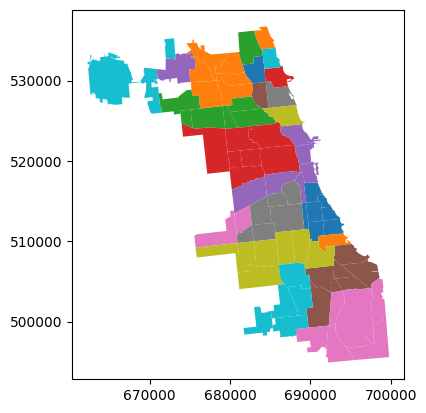

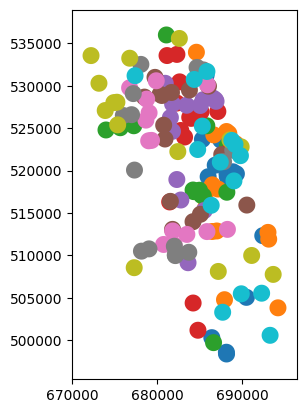

In [ ]:
# Look at Chicago:
chicago.plot(cmap='tab10');

# Now buffer groceries to find area within 1km.
# Check CRS -- USA Contiguous Albers Equal Area, units of meters.
groceries.crs

# make 1km buffer
groceries['geometry']= groceries.buffer(1000)

groceries.plot(cmap='tab10');

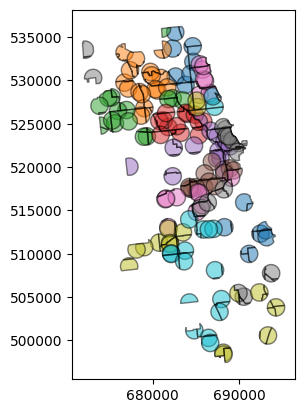

In [ ]:
#To select only the portion of community areas within 1km of a grocery, specify the how option to be “intersect”, which creates a new set of polygons where these two layers overlap:

chicago_cores = chicago.overlay(groceries, how='intersection')

chicago_cores.plot(alpha=0.5, edgecolor='k', cmap='tab10');

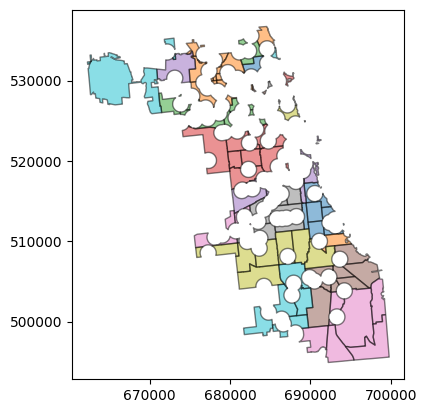

In [ ]:
#Changing the how option allows for different types of overlay operations. For example, if you were interested in the portions of Chicago far from groceries (the peripheries), you would compute the difference of the two.

chicago_peripheries = chicago.overlay(groceries, how='difference')

chicago_peripheries.plot(alpha=0.5, edgecolor='k', cmap='tab10');

<a name="t4"></a>
## 📊 **Assignment**

We have already created a GeoPandas DataFrame for a single floor of one the KAAN Projects. Now, the aim is to pick a whole project (containing all the floors) and create a GeoDataFrame.

